<a href="https://colab.research.google.com/github/DataMinati/Super-Notebooks-100/blob/main/Water_Bodies_Flow_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
from datetime import datetime as dt

In [2]:
#Dowloading the data for Lake Bilancino 
lb= pd.read_csv('https://raw.githubusercontent.com/MainakRepositor/Datasets-/master/Lake_Bilancino.csv')
lb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6603 entries, 0 to 6602
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  6603 non-null   object 
 1   Rainfall_S_Piero      6026 non-null   float64
 2   Rainfall_Mangona      6026 non-null   float64
 3   Rainfall_S_Agata      6026 non-null   float64
 4   Rainfall_Cavallina    6026 non-null   float64
 5   Rainfall_Le_Croci     6026 non-null   float64
 6   Temperature_Le_Croci  6025 non-null   float64
 7   Lake_Level            6603 non-null   float64
 8   Flow_Rate             6582 non-null   float64
dtypes: float64(8), object(1)
memory usage: 464.4+ KB


In [ ]:
lb.describe()

,Rainfall_S_Piero,Rainfall_Mangona,Rainfall_S_Agata,Rainfall_Cavallina,Rainfall_Le_Croci,Temperature_Le_Croci,Lake_Level,Flow_Rate
count,6026.000000,6026.000000,6026.000000,6026.000000,6026.000000,6025.000000,6603.000000,6582.000000
mean,2.471225,3.340657,2.670063,2.674743,3.129871,14.530141,249.564091,2.760968
std,6.650012,8.903134,7.166643,7.655847,8.025121,6.944029,2.172558,4.073428
min,0.000000,0.000000,0.000000,0.000000,0.000000,-5.350000,243.530000,0.310000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,248.000000,0.600000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,14.500000,250.200000,1.500000
75%,0.800000,1.400000,1.200000,0.600000,1.200000,20.100000,251.400000,3.000000
max,80.600000,110.000000,120.200000,113.600000,88.400000,34.000000,252.760000,74.650000


In [ ]:
#Checking the columns
lb.columns

Index(['Date', 'Rainfall_S_Piero', 'Rainfall_Mangona', 'Rainfall_S_Agata',
       'Rainfall_Cavallina', 'Rainfall_Le_Croci', 'Temperature_Le_Croci',
       'Lake_Level', 'Flow_Rate'],
      dtype='object')

In [ ]:
#Checking data of Lake Bilancino
lb.tail()

,Date,Rainfall_S_Piero,Rainfall_Mangona,Rainfall_S_Agata,Rainfall_Cavallina,Rainfall_Le_Croci,Temperature_Le_Croci,Lake_Level,Flow_Rate
6598,26/06/2020,0.0,0.0,0.0,0.0,0.0,22.50,250.85,0.6
6599,27/06/2020,0.0,0.0,0.0,0.0,0.0,23.40,250.84,0.6
6600,28/06/2020,0.0,0.0,0.0,0.0,0.0,21.50,250.83,0.6
6601,29/06/2020,0.0,0.0,0.0,0.0,0.0,23.20,250.82,0.6
6602,30/06/2020,0.0,0.0,0.0,0.0,0.0,22.75,250.80,0.6


In [ ]:
lb['Date']= pd.to_datetime(lb['Date'])
lb['Year']= lb['Date'].dt.year
lb['Month']=lb['Date'].dt.month
lb.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6603 entries, 0 to 6602
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  6603 non-null   datetime64[ns]
 1   Rainfall_S_Piero      6026 non-null   float64       
 2   Rainfall_Mangona      6026 non-null   float64       
 3   Rainfall_S_Agata      6026 non-null   float64       
 4   Rainfall_Cavallina    6026 non-null   float64       
 5   Rainfall_Le_Croci     6026 non-null   float64       
 6   Temperature_Le_Croci  6025 non-null   float64       
 7   Lake_Level            6603 non-null   float64       
 8   Flow_Rate             6582 non-null   float64       
 9   Year                  6603 non-null   int64         
 10  Month                 6603 non-null   int64         
dtypes: datetime64[ns](1), float64(8), int64(2)
memory usage: 567.6 KB


In [ ]:
lb.head()

,Date,Rainfall_S_Piero,Rainfall_Mangona,Rainfall_S_Agata,Rainfall_Cavallina,Rainfall_Le_Croci,Temperature_Le_Croci,Lake_Level,Flow_Rate,Year,Month
0,2002-03-06,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31,2002,3
1,2002-04-06,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31,2002,4
2,2002-05-06,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31,2002,5
3,2002-06-06,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31,2002,6
4,2002-07-06,NaN,NaN,NaN,NaN,NaN,NaN,249.44,0.31,2002,7


In [ ]:
#grouping by year and months
Lake_level= lb.groupby(["Year", "Month"]).Lake_Level.mean().reset_index()
Lake_level.head()

,Year,Month,Lake_Level
0,2002,1,249.158333
1,2002,2,249.143333
2,2002,3,249.172857
3,2002,4,249.148571
4,2002,5,249.130000


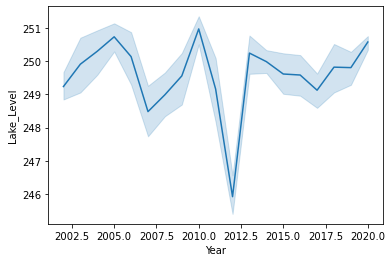

In [ ]:
#plotting the lake level over the TS to see the variation over year
sns.lineplot(data=Lake_level, x="Year", y="Lake_Level")

In [ ]:
#min(lb['Lake_Level'])
print(Lake_level[Lake_level.Lake_Level==Lake_level.Lake_Level.min()])

     Year  Month  Lake_Level
129  2012     10  244.520645


In [ ]:
#max(lb['Lake_Level'])
print(Lake_level[Lake_level.Lake_Level==Lake_level.Lake_Level.max()])

    Year  Month  Lake_Level
98  2010      3  251.582258


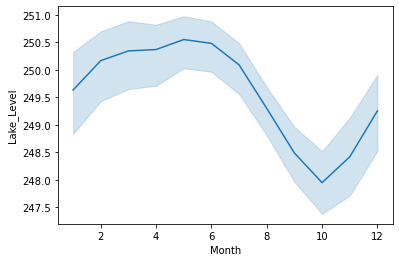

In [ ]:
#plotting the lake level over the TS to see the variation over month
sns.lineplot(data=Lake_level, x="Month", y="Lake_Level")

**Checking the flow rate over Months and Years**

In [ ]:
flow_rate= lb.groupby(["Year","Month"]).Flow_Rate.mean().reset_index()
flow_rate.head()

,Year,Month,Flow_Rate
0,2002,1,1.180000
1,2002,2,2.216667
2,2002,3,2.315714
3,2002,4,2.001429
4,2002,5,2.072857


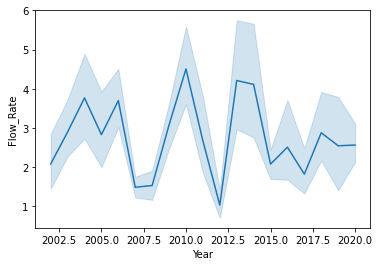

In [ ]:
#Plotting the flow rate over the years (2002-2020)
sns.lineplot(data=flow_rate,x="Year",y= "Flow_Rate")

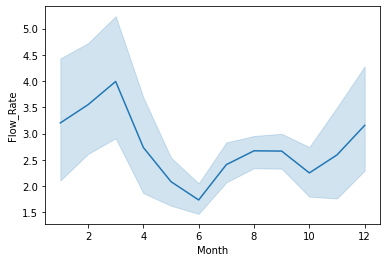

In [ ]:
#Plotting the flow rate over the years (2002-2020)
sns.lineplot(data=flow_rate,x="Month",y= "Flow_Rate")

**Finding the Month and year with extreme flow rate data**

In [ ]:
print(flow_rate[flow_rate.Flow_Rate==flow_rate.Flow_Rate.min()])

     Year  Month  Flow_Rate
124  2012      5   0.543548


In [ ]:
print(flow_rate[flow_rate.Flow_Rate==flow_rate.Flow_Rate.max()])

     Year  Month  Flow_Rate
134  2013      3   11.73129


Flow rate was minimum during May-2012 and Maximum during March 2013

# **Rain fall and Temperature Variation over Month & year**

In [ ]:
# Rain ditribution over the year
rain_yearly= lb.groupby(["Year"])[['Rainfall_S_Piero', 'Rainfall_Mangona', 'Rainfall_S_Agata','Rainfall_Cavallina','Rainfall_Le_Croci']].mean().reset_index()
rain_yearly.head()

,Year,Rainfall_S_Piero,Rainfall_Mangona,Rainfall_S_Agata,Rainfall_Cavallina,Rainfall_Le_Croci
0,2002,NaN,NaN,NaN,NaN,NaN
1,2003,NaN,NaN,NaN,NaN,NaN
2,2004,2.387432,3.387432,2.214208,2.915301,3.053005
3,2005,2.574795,3.069041,2.974247,2.690411,3.058082
4,2006,2.031233,3.007671,2.193425,1.775890,2.558904


# **Plotting the rain pattern over the years**

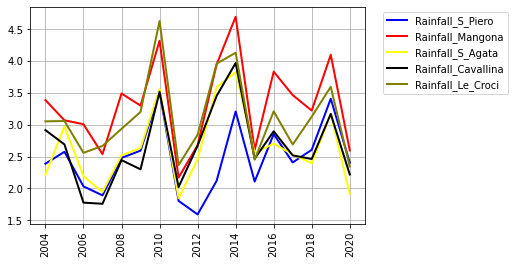

In [ ]:
plt.plot( 'Year', 'Rainfall_S_Piero', data=rain_yearly, marker='', color='blue', linewidth=2)
plt.plot( 'Year', 'Rainfall_Mangona', data=rain_yearly, marker='', color='red', linewidth=2)
plt.plot( 'Year', 'Rainfall_S_Agata', data=rain_yearly, marker='', color='yellow', linewidth=2)
plt.plot( 'Year', 'Rainfall_Cavallina', data=rain_yearly, marker='', color='black', linewidth=2)
plt.plot( 'Year', 'Rainfall_Le_Croci', data=rain_yearly, marker='', color='olive', linewidth=2)
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.xticks(rotation = 90)
plt.grid()

In [ ]:
#Rain distribution over the Months
rain_monthly= lb.groupby(["Month"])[['Rainfall_S_Piero', 'Rainfall_Mangona', 'Rainfall_S_Agata','Rainfall_Cavallina','Rainfall_Le_Croci']].mean().reset_index()
rain_monthly.head()

,Month,Rainfall_S_Piero,Rainfall_Mangona,Rainfall_S_Agata,Rainfall_Cavallina,Rainfall_Le_Croci
0,1,3.200384,4.638004,3.177351,3.612668,4.254127
1,2,2.679158,3.578526,2.832421,2.949474,3.670737
2,3,2.137428,2.924376,2.381190,2.514012,2.829175
3,4,2.705159,3.553968,2.823016,2.771429,3.422619
4,5,2.682917,3.623033,2.938196,2.812668,3.493282


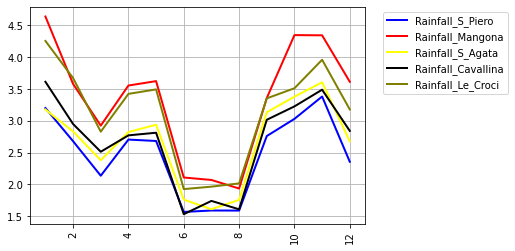

In [ ]:
plt.plot( 'Month', 'Rainfall_S_Piero', data=rain_monthly, marker='', color='blue', linewidth=2)
plt.plot( 'Month', 'Rainfall_Mangona', data=rain_monthly, marker='', color='red', linewidth=2)
plt.plot( 'Month', 'Rainfall_S_Agata', data=rain_monthly, marker='', color='yellow', linewidth=2)
plt.plot( 'Month', 'Rainfall_Cavallina', data=rain_monthly, marker='', color='black', linewidth=2)
plt.plot( 'Month', 'Rainfall_Le_Croci', data=rain_monthly, marker='', color='olive', linewidth=2)
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.xticks(rotation = 90)
plt.grid()

**Observation**
1. The above plot shows Mangona recieves the maximum rain and S_Piero recieves the minimum over the months in a year. 
2. July to August period is the relatively dry period where there is consistent minimum rain.
3. September to February is the time when its raining to a decent level.


In [ ]:
temperature=lb.groupby(["Year","Month"]).Temperature_Le_Croci.mean().reset_index()
temperature.head()


,Year,Month,Temperature_Le_Croci
0,2002,1,NaN
1,2002,2,NaN
2,2002,3,NaN
3,2002,4,NaN
4,2002,5,NaN


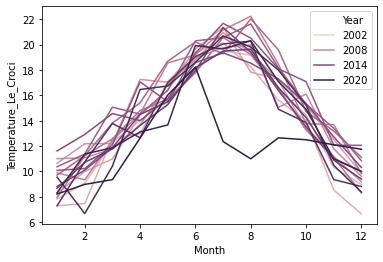

In [ ]:
# Plotting the temperature pattern over the Year and Months
temperature["Year"]=temperature["Year"].astype(str)
sns.lineplot(data=temperature, x="Month", y="Temperature_Le_Croci", hue="Year")

Temperature grdually increases from January and reches to peak during June to August and gradually decreases to minimum in January

In [ ]:
#Counting the Null value in Rain fall columns
lb[['Rainfall_S_Piero','Rainfall_Mangona', 'Rainfall_S_Agata','Rainfall_Cavallina','Rainfall_Le_Croci']].isnull().sum()

Rainfall_S_Piero      577
Rainfall_Mangona      577
Rainfall_S_Agata      577
Rainfall_Cavallina    577
Rainfall_Le_Croci     577
dtype: int64

In [ ]:
# Dropping the rows with missing Rainfall values from Le_Croci
lb1=lb.dropna(subset=["Rainfall_Le_Croci","Temperature_Le_Croci"])
lb1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6025 entries, 578 to 6602
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  6025 non-null   datetime64[ns]
 1   Rainfall_S_Piero      6025 non-null   float64       
 2   Rainfall_Mangona      6025 non-null   float64       
 3   Rainfall_S_Agata      6025 non-null   float64       
 4   Rainfall_Cavallina    6025 non-null   float64       
 5   Rainfall_Le_Croci     6025 non-null   float64       
 6   Temperature_Le_Croci  6025 non-null   float64       
 7   Lake_Level            6025 non-null   float64       
 8   Flow_Rate             6025 non-null   float64       
 9   Year                  6025 non-null   int64         
 10  Month                 6025 non-null   int64         
dtypes: datetime64[ns](1), float64(8), int64(2)
memory usage: 564.8 KB


In [ ]:
lb1.head()

,Date,Rainfall_S_Piero,Rainfall_Mangona,Rainfall_S_Agata,Rainfall_Cavallina,Rainfall_Le_Croci,Temperature_Le_Croci,Lake_Level,Flow_Rate,Year,Month
578,2004-02-01,0.0,0.0,0.0,0.0,0.0,6.50,251.21,0.5,2004,2
579,2004-03-01,0.0,0.0,0.0,0.0,0.0,4.45,251.28,0.5,2004,3
580,2004-04-01,0.0,0.0,0.0,0.0,0.0,2.00,251.35,0.5,2004,4
581,2004-05-01,0.2,0.0,0.0,0.0,0.0,0.90,251.37,0.5,2004,5
582,2004-06-01,0.0,0.0,0.0,0.0,0.0,2.25,251.42,0.5,2004,6


In general flow rate is a function of lake Level
Q= f(H)


**Preparing the data for modeling**

In [ ]:
lb1['Rainfall_mean']=lb1[['Rainfall_S_Piero','Rainfall_Mangona', 'Rainfall_S_Agata','Rainfall_Cavallina','Rainfall_Le_Croci']].mean(axis = 1)
#lb1['Rainfall_mean']=lb1.apply(lambda row:(row.Rainfall_S_Piero+ row.Rainfall_Mangona+row.Rainfall_S_Agata+row.Rainfall_Cavallina+row.Rainfall_Le_Croci)/5,axis=1)
lb1['Rainfall_median']=lb1[['Rainfall_S_Piero','Rainfall_Mangona', 'Rainfall_S_Agata','Rainfall_Cavallina','Rainfall_Le_Croci']].median(axis = 1)
lb1['Rainfall_min']=lb1[['Rainfall_S_Piero','Rainfall_Mangona', 'Rainfall_S_Agata','Rainfall_Cavallina','Rainfall_Le_Croci']].min(axis = 1)
lb1['Rainfall_max']=lb1[['Rainfall_S_Piero','Rainfall_Mangona', 'Rainfall_S_Agata','Rainfall_Cavallina','Rainfall_Le_Croci']].max(axis = 1)
lb1['Rainfall_net']=lb1[['Rainfall_S_Piero','Rainfall_Mangona', 'Rainfall_S_Agata','Rainfall_Cavallina','Rainfall_Le_Croci']].sum(axis = 1)
lb1.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

,Date,Rainfall_S_Piero,Rainfall_Mangona,Rainfall_S_Agata,Rainfall_Cavallina,Rainfall_Le_Croci,Temperature_Le_Croci,Lake_Level,Flow_Rate,Year,Month,Rainfall_mean,Rainfall_median,Rainfall_min,Rainfall_max,Rainfall_net
578,2004-02-01,0.0,0.0,0.0,0.0,0.0,6.50,251.21,0.5,2004,2,0.00,0.0,0.0,0.0,0.0
579,2004-03-01,0.0,0.0,0.0,0.0,0.0,4.45,251.28,0.5,2004,3,0.00,0.0,0.0,0.0,0.0
580,2004-04-01,0.0,0.0,0.0,0.0,0.0,2.00,251.35,0.5,2004,4,0.00,0.0,0.0,0.0,0.0
581,2004-05-01,0.2,0.0,0.0,0.0,0.0,0.90,251.37,0.5,2004,5,0.04,0.0,0.0,0.2,0.2
582,2004-06-01,0.0,0.0,0.0,0.0,0.0,2.25,251.42,0.5,2004,6,0.00,0.0,0.0,0.0,0.0


In [ ]:
lb1['day_of_the_year'] = lb1['Date'].dt.dayofyear

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


# **Heat map for checking the corelation between original & derived variables**

In [ ]:
lb1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6025 entries, 578 to 6602
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  6025 non-null   datetime64[ns]
 1   Rainfall_S_Piero      6025 non-null   float64       
 2   Rainfall_Mangona      6025 non-null   float64       
 3   Rainfall_S_Agata      6025 non-null   float64       
 4   Rainfall_Cavallina    6025 non-null   float64       
 5   Rainfall_Le_Croci     6025 non-null   float64       
 6   Temperature_Le_Croci  6025 non-null   float64       
 7   Lake_Level            6025 non-null   float64       
 8   Flow_Rate             6025 non-null   float64       
 9   Year                  6025 non-null   int64         
 10  Month                 6025 non-null   int64         
 11  Rainfall_mean         6025 non-null   float64       
 12  Rainfall_median       6025 non-null   float64       
 13  Rainfall_min    

In [ ]:
corr= lb1.drop(['Date'], axis=1)

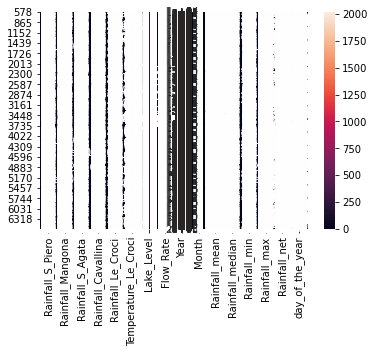

In [ ]:
#plt.figure(figsize=(15, 15))

sns.heatmap(corr, annot = True)

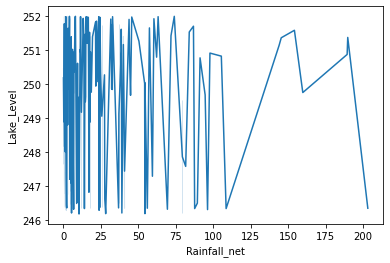

In [ ]:
#Rainfall and lake level trend
comp=lb1[lb1["Year"].isin([2018])]
comp1=comp[["Lake_Level","Rainfall_net","Month"]]
sns.lineplot(data=comp1, x="Rainfall_net", y="Lake_Level")

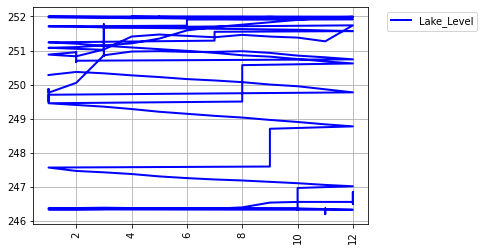

In [ ]:
plt.plot( 'Month','Lake_Level', data=comp1, marker='', color='blue', linewidth=2)
#plt.plot( 'Month','Rainfall_mean', data=comp1, marker='', color='red', linewidth=2)
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.xticks(rotation = 90)
plt.grid()

In [ ]:
X= lb1[["Year","Month","Temperature_Le_Croci","Rainfall_mean", "day_of_the_year","Rainfall_median","Rainfall_net"]]

X.head()

,Year,Month,Temperature_Le_Croci,Rainfall_mean,day_of_the_year,Rainfall_median,Rainfall_net
578,2004,2,6.50,0.00,32,0.0,0.0
579,2004,3,4.45,0.00,61,0.0,0.0
580,2004,4,2.00,0.00,92,0.0,0.0
581,2004,5,0.90,0.04,122,0.0,0.2
582,2004,6,2.25,0.00,153,0.0,0.0


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6025 entries, 578 to 6602
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  6025 non-null   int64  
 1   Month                 6025 non-null   int64  
 2   Temperature_Le_Croci  6025 non-null   float64
 3   Rainfall_mean         6025 non-null   float64
 4   day_of_the_year       6025 non-null   int64  
 5   Rainfall_median       6025 non-null   float64
 6   Rainfall_net          6025 non-null   float64
dtypes: float64(4), int64(3)
memory usage: 376.6 KB


In [ ]:
y=lb1[["Lake_Level"]]
y.head()

,Lake_Level
578,251.21
579,251.28
580,251.35
581,251.37
582,251.42


In [ ]:
y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6025 entries, 578 to 6602
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Lake_Level  6025 non-null   float64
dtypes: float64(1)
memory usage: 94.1 KB


# **Linear regression for Modeling**

In [ ]:
import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

**Create X_train, y_train, X_test and Y_test**

In [ ]:
train = lb1[~lb1['Year'].isin([2017,2018,2019,2020])]
test = lb1[lb1['Year'].isin([2018])]

X_train = train[["Year","Month","Temperature_Le_Croci","Rainfall_mean","Rainfall_net","day_of_the_year"]]
y_train = train[["Lake_Level"]]

X_test = test[["Year","Month","Temperature_Le_Croci","Rainfall_mean", "Rainfall_net","day_of_the_year"]]
y_test = test[["Lake_Level"]]

In [ ]:
#X_train, X_test,y_train, y_test= train_test_split(X, y, train_size=0.8 , random_state=100)
lr= LinearRegression(normalize=True)

In [ ]:
y_train.shape

(4748, 1)

In [ ]:
y_test.shape

(365, 1)

In [ ]:
X_train.shape

(4748, 6)

In [ ]:
X_test.shape

(365, 6)

In [ ]:
lr.fit(X_train,y_train)

LinearRegression(normalize=True)

In [ ]:
y_pred= lr.predict(X_test)

**Evaluate the model by comparing the predictions with the actual labels**

In [ ]:
r_squared = r2_score(y_test, y_pred)

In [ ]:
r_squared

0.11786511830489876

# **Random forest for Modeling**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=100, random_state=0)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.6974756195045533